In [5]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
#importing the dataset
crop = pd.read_csv("Crop_recommendation.csv")
crop.drop(crop[crop.label == 'muskmelon'].index, inplace = True )


In [10]:
#copying original data
data = crop.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2100 non-null   int64  
 1   phosphorus   2100 non-null   int64  
 2   potassium    2100 non-null   int64  
 3   temperature  2100 non-null   float64
 4   humidity     2100 non-null   float64
 5   ph           2100 non-null   float64
 6   rainfall     2100 non-null   float64
 7   label        2100 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 180.5+ KB


In [12]:
# Drop unwanted columns
data = data.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)

# Check the dataset after dropping columns
print("Dataset after dropping columns:")
print(data.head())


Dataset after dropping columns:
   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice  


In [ ]:
#checking for null values
data.isnull().sum().any()

False

In [ ]:
#checking for unique values
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))

column Name :  NITROGEN
No. of unique values : 137 

column Name :  PHOSPHORUS
No. of unique values : 117 

column Name :  POTASSIUM
No. of unique values : 73 

column Name :  TEMPERATURE
No. of unique values : 2100 

column Name :  HUMIDITY
No. of unique values : 2100 

column Name :  PH
No. of unique values : 2100 

column Name :  RAINFALL
No. of unique values : 2100 

column Name :  LABEL
No. of unique values : 21 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


There are 22 classes in output variable

In [ ]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order

In [ ]:
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,19
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,19
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,19
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,19
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,19


In [ ]:
#encoded labels for classes
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [20]:
#dropping duplicate values
data = data.drop_duplicates()
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


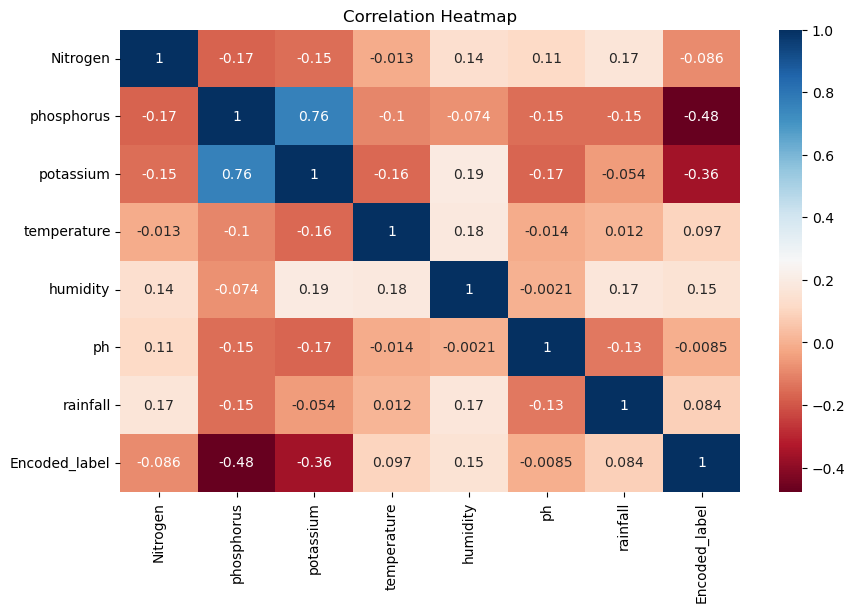

In [ ]:
# Drop Non-Numeric Columns
data_numeric = data.select_dtypes(include=[np.number])

# Check if there are numeric columns left
if data_numeric.empty:
    print("No numeric columns available for correlation.")
else:
    # Plot heatmap with numeric columns only
    plt.figure(figsize=(10, 6))
    sns.heatmap(data_numeric.corr(), annot=True, cmap='RdBu')
    plt.title("Correlation Heatmap")
    plt.show()


From the above diagram, the variable 'K' and 'P' have high positive corelation

In [ ]:
#EDA
data.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Encoded_label
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,48.181905,55.060000,48.057143,25.471157,70.488397,6.474750,107.214784,10.000000
std,36.016740,32.772902,51.833864,5.134671,22.303929,0.790175,53.425191,6.056743
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,30.920140,0.000000
25%,20.000000,31.000000,20.000000,22.602437,59.237124,5.948298,67.133894,5.000000
50%,36.000000,53.000000,30.000000,25.373357,79.995776,6.431478,97.659622,10.000000
75%,80.250000,69.000000,47.000000,28.282950,88.018773,6.945725,130.140535,15.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,20.000000


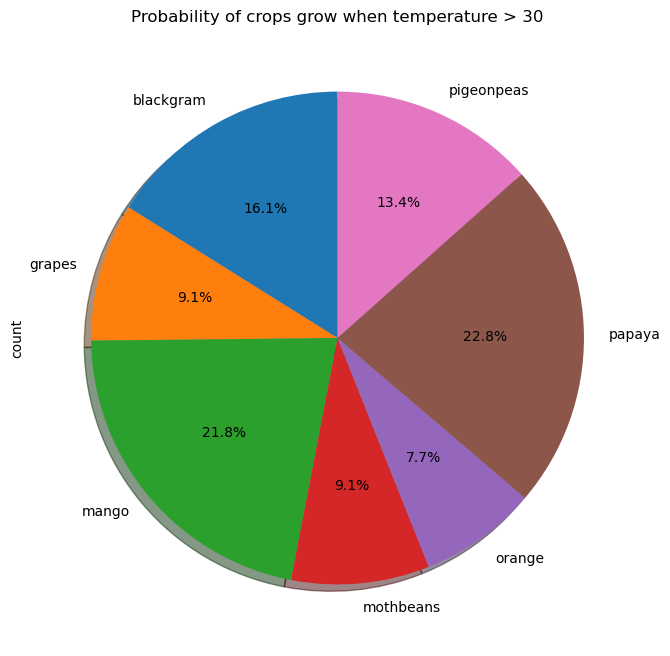

In [ ]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(data.label[data.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

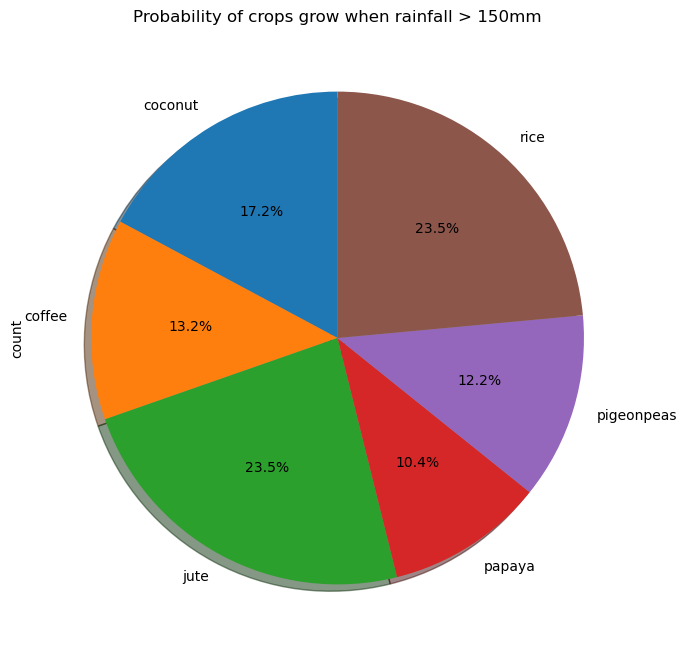

In [ ]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

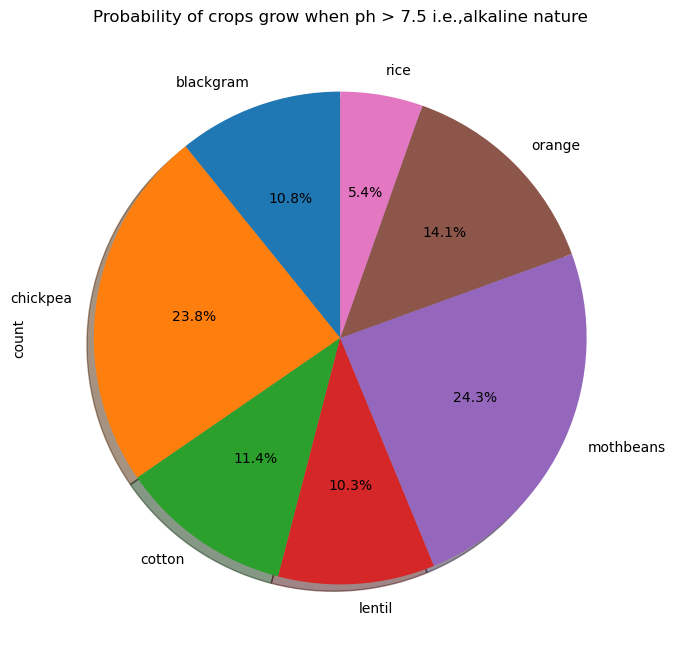

In [ ]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(data.label[data.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

In [ ]:
#Splitting the data into input and output
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
    Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall  
0  202.935536  
1  226.655537  
2  263.964248  
3  242.864034  
4  262.717340  

Output Variable
 0    19
1    19
2    19
3    19
4    19
Name: Encoded_label, dtype: int32


In [ ]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting :
x_train = (1680, 7), x_test = (420, 7), y_train = (1680,), y_test = (420,)


KNN

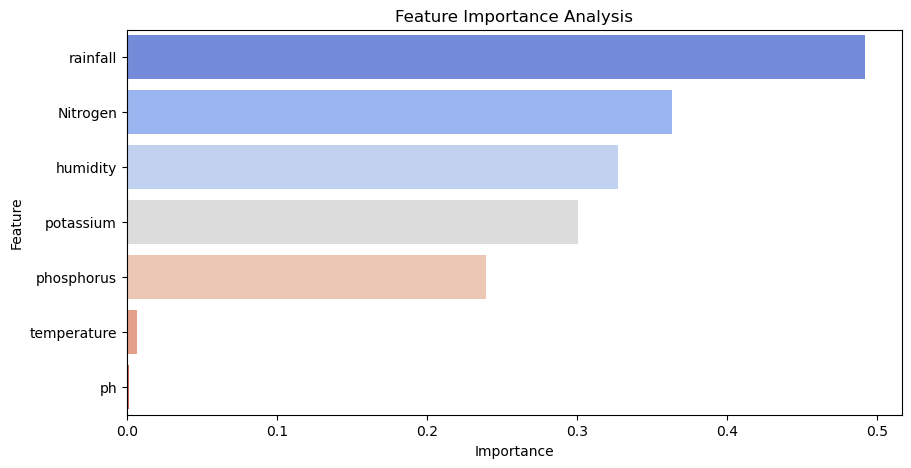


 Model Training Time: 0.0158 seconds
 Feature Importance Calculation Time: 7.4400 seconds

📌 *Model Performance Metrics:*
 Training Accuracy: 98.8636%
 Test Accuracy: 97.0455%
 Cross-Validation Score: 98.1818%
 Precision: 96.9430%
 Recall: 97.1037%
 F1 Score: 96.9448%

Accuracy of the IBK (k-NN) Model: 0.9704545454545455

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the IBK (k-NN) model
knn_model = KNeighborsClassifier(n_neighbors=3)  # Using k=3 as an example
start_time = time.time()
knn_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Cross-Validation to Check Overfitting
cv_scores = cross_val_score(knn_model, X, y, cv=5)

# Feature Importance Analysis (using permutation importance)
start_time = time.time()
perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_time = time.time() - start_time

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance Analysis")
plt.show()

# Formatting the output
def format_classification_report(report):
    formatted_report = ""
    formatted_report += f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}\n"
    formatted_report += "-" * 55 + "\n"
    for label, metrics in report.items():
        if isinstance(metrics, dict):
          if label in ["accuracy", "macro avg", "weighted avg"]:
            formatted_report += f"{label:<15} {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}      {metrics['support']:4.0f}\n"
    formatted_report += "-" * 55 + "\n"
    formatted_report += f"{'Accuracy':<15} {accuracy:.8f}\n"
    return formatted_report

# Print Results
print(f"\n Model Training Time: {training_time:.4f} seconds")
print(f" Feature Importance Calculation Time: {feature_importance_time:.4f} seconds\n")
print(f"📌 *Model Performance Metrics:*")
print(f" Training Accuracy: {accuracy_score(y_train, knn_model.predict(X_train)):.4%}")
print(f" Test Accuracy: {accuracy:.4%}")
print(f" Cross-Validation Score: {cv_scores.mean():.4%}")
print(f" Precision: {precision_score(y_test, y_pred, average='macro'):.4%}")
print(f" Recall: {recall_score(y_test, y_pred, average='macro'):.4%}")
print(f" F1 Score: {f1_score(y_test, y_pred, average='macro'):.4%}\n")

print("Accuracy of the IBK (k-NN) Model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(format_classification_report(report))

RANDOM FOREST

C:\Users\sande\AppData\Local\Temp\ipykernel_5480\2865794248.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")


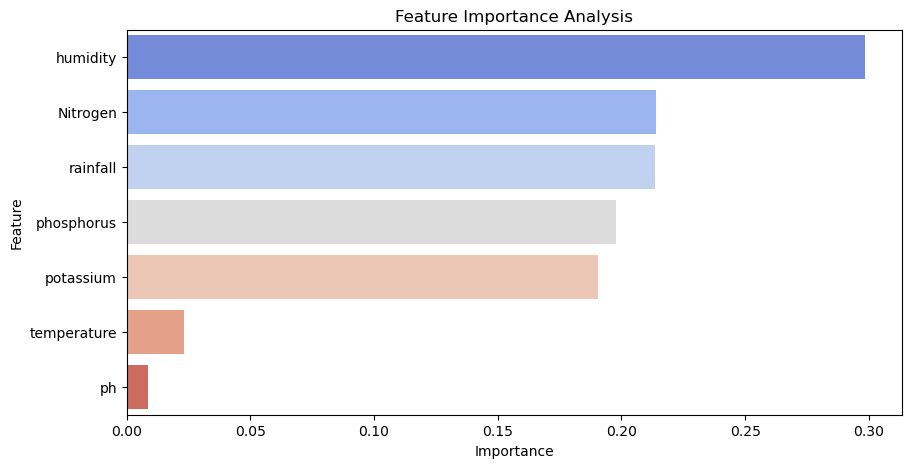


✅ Model Training Time: 0.3136 seconds
✅ Model Testing Time: 0.0101 seconds
✅ Feature Importance Calculation Time: 0.9719 seconds

📌 Model Performance Metrics:
✅ Training Accuracy: 99.8864%
✅ Test Accuracy: 99.3182%
✅ Cross-Validation Score: 99.3182%
✅ Precision: 99.2576%
✅ Recall: 99.3321%
✅ F1 Score: 99.2637%

Accuracy of the Random Forest Model: 0.9931818181818182

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0 

In [45]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier model (Prevent Overfitting)
rf_model = RandomForestClassifier(
    n_estimators=50,             # Reduce number of trees
    max_depth=10,                # Limit depth of trees
    min_samples_split=5,         # Minimum samples to split
    min_samples_leaf=3,          # Minimum samples per leaf
    criterion="entropy",
    random_state=42
)

# Measure training time
start_train_time = time.time()
rf_model.fit(X_train, y_train)
training_time = time.time() - start_train_time

# Measure testing time
start_test_time = time.time()
y_pred = rf_model.predict(X_test)
testing_time = time.time() - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Cross-Validation to Check Overfitting
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Feature Importance Analysis (using permutation importance)
start_feature_time = time.time()
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_time = time.time() - start_feature_time

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance Analysis")
plt.show()

# Formatting the output
def format_classification_report(report):
    formatted_report = ""
    formatted_report += f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}\n"
    formatted_report += "-" * 55 + "\n"
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            if label in ["accuracy", "macro avg", "weighted avg"]:
                formatted_report += f"{label:<15} {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}      {metrics['support']:4.0f}\n"
    formatted_report += "-" * 55 + "\n"
    formatted_report += f"{'Accuracy':<15} {accuracy:.8f}\n"
    return formatted_report

# Print Results
print(f"\n✅ Model Training Time: {training_time:.4f} seconds")
print(f"✅ Model Testing Time: {testing_time:.4f} seconds")
print(f"✅ Feature Importance Calculation Time: {feature_importance_time:.4f} seconds\n")

print(f"📌 Model Performance Metrics:")
print(f"✅ Training Accuracy: {accuracy_score(y_train, rf_model.predict(X_train)):.4%}")  # Should be less than 100%
print(f"✅ Test Accuracy: {accuracy:.4%}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.4%}")
print(f"✅ Precision: {precision_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ Recall: {recall_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ F1 Score: {f1_score(y_test, y_pred, average='macro'):.4%}\n")

print("Accuracy of the Random Forest Model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(format_classification_report(report))  


LOGISTIC REGRESSION

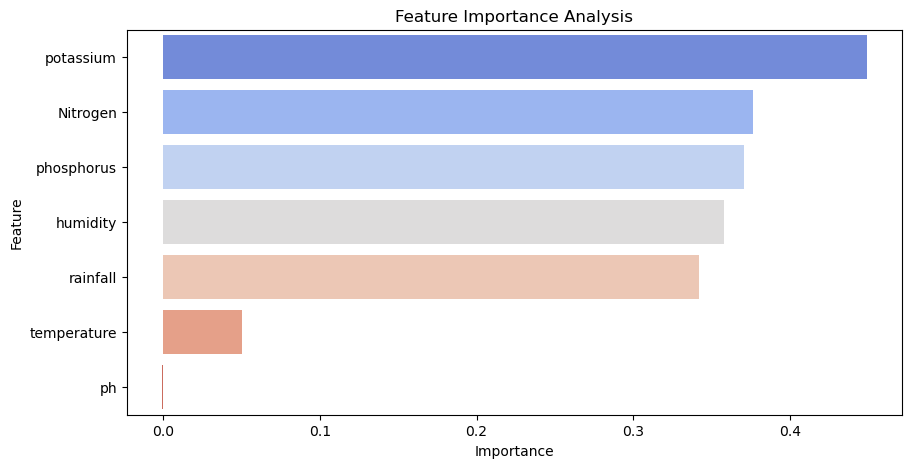


✅ Model Training Time: 9.8183 seconds
✅ Model Testing Time: 0.0060 seconds
✅ Feature Importance Calculation Time: 0.4271 seconds

📌 Model Performance Metrics:
✅ Training Accuracy: 98.1250%
✅ Test Accuracy: 95.0000%
✅ Cross-Validation Score: 97.0455%
✅ Precision: 94.7647%
✅ Recall: 95.1025%
✅ F1 Score: 94.8427%

Accuracy of the Logistic Regression Model: 0.95

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0

In [18]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)

# Measure training time
start_train_time = time.time()
log_reg_model.fit(X_train, y_train)
training_time = time.time() - start_train_time

# Measure testing time
start_test_time = time.time()
y_pred = log_reg_model.predict(X_test)
testing_time = time.time() - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Cross-Validation to Check Overfitting
cv_scores = cross_val_score(log_reg_model, X, y, cv=5)

# Feature Importance Analysis (using permutation importance)
start_feature_time = time.time()
perm_importance = permutation_importance(log_reg_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_time = time.time() - start_feature_time

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance Analysis")
plt.show()

# Formatting the output
def format_classification_report(report):
    formatted_report = ""
    formatted_report += f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}\n"
    formatted_report += "-" * 55 + "\n"
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            if label in ["accuracy", "macro avg", "weighted avg"]:
                formatted_report += f"{label:<15} {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}      {metrics['support']:4.0f}\n"
    formatted_report += "-" * 55 + "\n"
    formatted_report += f"{'Accuracy':<15} {accuracy:.8f}\n"
    return formatted_report

# Print Results
print(f"\n✅ Model Training Time: {training_time:.4f} seconds")
print(f"✅ Model Testing Time: {testing_time:.4f} seconds")
print(f"✅ Feature Importance Calculation Time: {feature_importance_time:.4f} seconds\n")

print(f"📌 Model Performance Metrics:")
print(f"✅ Training Accuracy: {accuracy_score(y_train, log_reg_model.predict(X_train)):.4%}")
print(f"✅ Test Accuracy: {accuracy:.4%}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.4%}")
print(f"✅ Precision: {precision_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ Recall: {recall_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ F1 Score: {f1_score(y_test, y_pred, average='macro'):.4%}\n")

print("Accuracy of the Logistic Regression Model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(format_classification_report(report))


NAVIE BAYES

C:\Users\saiha\AppData\Local\Temp\ipykernel_3908\3305868293.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")


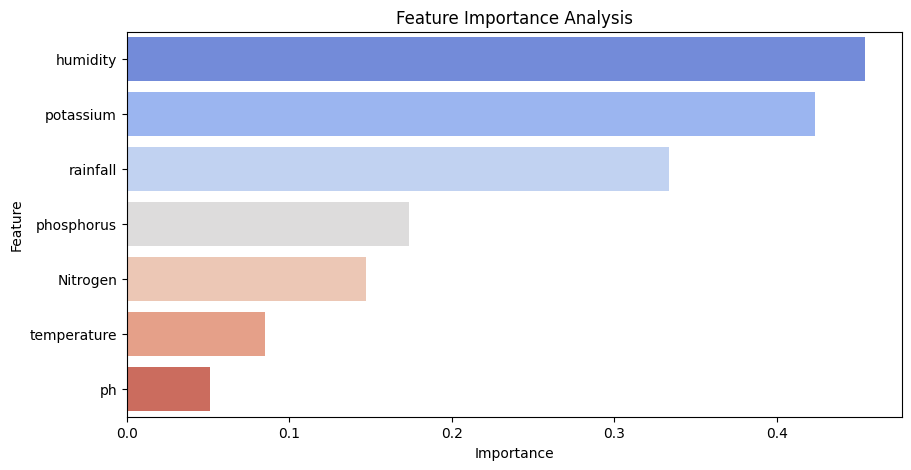


✅ Model Training Time: 0.0080 seconds
✅ Model Testing Time: 0.0050 seconds
✅ Feature Importance Calculation Time: 0.4195 seconds

📌 Model Performance Metrics:
✅ Training Accuracy: 99.4886%
✅ Test Accuracy: 99.5455%
✅ Cross-Validation Score: 99.5000%
✅ Precision: 99.6364%
✅ Recall: 99.5215%
✅ F1 Score: 99.5581%

Accuracy of the Naive Bayes Model: 0.9954545454545455

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Measure training time
start_train_time = time.time()
nb_model.fit(X_train, y_train)
training_time = time.time() - start_train_time

# Measure testing time
start_test_time = time.time()
y_pred = nb_model.predict(X_test)
testing_time = time.time() - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Cross-Validation to Check Overfitting
cv_scores = cross_val_score(nb_model, X, y, cv=5)

# Feature Importance Analysis (using permutation importance)
start_feature_time = time.time()
perm_importance = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_time = time.time() - start_feature_time

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance Analysis")
plt.show()

# Formatting the output
def format_classification_report(report):
    formatted_report = ""
    formatted_report += f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}\n"
    formatted_report += "-" * 55 + "\n"
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            if label in ["accuracy", "macro avg", "weighted avg"]:
                formatted_report += f"{label:<15} {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}      {metrics['support']:4.0f}\n"
    formatted_report += "-" * 55 + "\n"
    formatted_report += f"{'Accuracy':<15} {accuracy:.8f}\n"
    return formatted_report

# Print Results
print(f"\n✅ Model Training Time: {training_time:.4f} seconds")
print(f"✅ Model Testing Time: {testing_time:.4f} seconds")
print(f"✅ Feature Importance Calculation Time: {feature_importance_time:.4f} seconds\n")

print(f"📌 Model Performance Metrics:")
print(f"✅ Training Accuracy: {accuracy_score(y_train, nb_model.predict(X_train)):.4%}")
print(f"✅ Test Accuracy: {accuracy:.4%}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.4%}")
print(f"✅ Precision: {precision_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ Recall: {recall_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ F1 Score: {f1_score(y_test, y_pred, average='macro'):.4%}\n")

print("Accuracy of the Naive Bayes Model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(format_classification_report(report))

In [2]:
import pickle

# Save the model
with open('naive_bayes_crop_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(le, encoder_file)

HoeffdingTreeClassifier

In [49]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from river.tree import HoeffdingTreeClassifier  # Import Hoeffding Tree
from river import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Pandas DataFrame to Dict format (required by river)
X_train_dict = X_train.to_dict(orient="records")
X_test_dict = X_test.to_dict(orient="records")

# Initialize the Hoeffding Tree Classifier
hdt_model = HoeffdingTreeClassifier()

# Train the model (Instance-by-instance)
start_train_time = time.time()
for xi, yi in zip(X_train_dict, y_train):
    hdt_model.learn_one(xi, yi)
training_time = time.time() - start_train_time

# Measure testing time
start_test_time = time.time()
y_pred = [hdt_model.predict_one(xi) for xi in X_test_dict]
testing_time = time.time() - start_test_time

# Evaluate the model
accuracy = metrics.Accuracy()
for yi, yp in zip(y_test, y_pred):
    accuracy.update(yi, yp)

conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Formatting the output
def format_classification_report(report):
    formatted_report = ""
    formatted_report += f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}\n"
    formatted_report += "-" * 55 + "\n"
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            if label in ["accuracy", "macro avg", "weighted avg"]:
                formatted_report += f"{label:<15} {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}      {metrics['support']:4.0f}\n"
    formatted_report += "-" * 55 + "\n"
    formatted_report += f"{'Accuracy':<15} {accuracy.get():.8f}\n"
    return formatted_report

# Print Results
print(f"\n✅ Model Training Time: {training_time:.4f} seconds")
print(f"✅ Model Testing Time: {testing_time:.4f} seconds\n")

print(f"📌 Model Performance Metrics:")
print(f"✅ Test Accuracy: {accuracy.get():.4%}")
print(f"✅ Precision: {precision_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ Recall: {recall_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ F1 Score: {f1_score(y_test, y_pred, average='macro'):.4%}\n")

print("Accuracy of the Hoeffding Tree Model:", accuracy.get())
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(format_classification_report(report))



✅ Model Training Time: 1.9639 seconds
✅ Model Testing Time: 0.3833 seconds

📌 Model Performance Metrics:
✅ Test Accuracy: 99.5455%
✅ Precision: 99.6364%
✅ Recall: 99.5215%
✅ F1 Score: 99.5581%

Accuracy of the Hoeffding Tree Model: 0.9954545454545455

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  

In [9]:
pip install river


SVM

In [58]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC  # Import SVM
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Feature Scaling (Important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Machine model
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)  # RBF Kernel (default)

# Measure training time
start_train_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_train_time

# Measure testing time
start_test_time = time.time()
y_pred = svm_model.predict(X_test)
testing_time = time.time() - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Cross-Validation to Check Overfitting
cv_scores = cross_val_score(svm_model, X, y, cv=5)

# Formatting the output
def format_classification_report(report):
    formatted_report = ""
    formatted_report += f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}\n"
    formatted_report += "-" * 55 + "\n"
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            if label in ["accuracy", "macro avg", "weighted avg"]:
                formatted_report += f"{label:<15} {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}      {metrics['support']:4.0f}\n"
    formatted_report += "-" * 55 + "\n"
    formatted_report += f"{'Accuracy':<15} {accuracy:.8f}\n"
    return formatted_report

# Print Results
print(f"\n✅ Model Training Time: {training_time:.4f} seconds")
print(f"✅ Model Testing Time: {testing_time:.4f} seconds\n")

print(f"📌 Model Performance Metrics:")
print(f"✅ Training Accuracy: {accuracy_score(y_train, svm_model.predict(X_train)):.4%}")
print(f"✅ Test Accuracy: {accuracy:.4%}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.4%}")
print(f"✅ Precision: {precision_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ Recall: {recall_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ F1 Score: {f1_score(y_test, y_pred, average='macro'):.4%}\n")

print("Accuracy of the SVM Model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(format_classification_report(report))



✅ Model Training Time: 0.0966 seconds
✅ Model Testing Time: 0.1397 seconds

📌 Model Performance Metrics:
✅ Training Accuracy: 98.8068%
✅ Test Accuracy: 96.8182%
✅ Cross-Validation Score: 98.2273%
✅ Precision: 96.7729%
✅ Recall: 96.9516%
✅ F1 Score: 96.6552%

Accuracy of the SVM Model: 0.9681818181818181

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 21  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  

adaboost

C:\Users\sande\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Preci

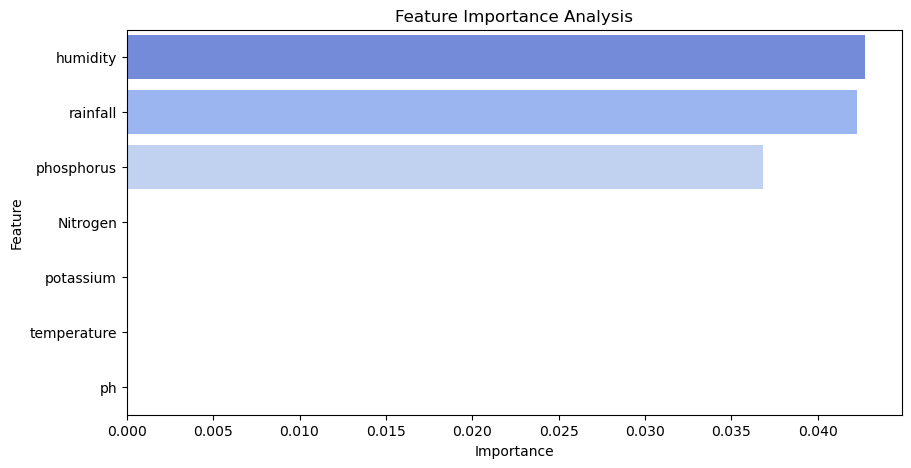


✅ Model Training Time: 0.9080 seconds
✅ Model Testing Time: 0.0500 seconds
✅ Feature Importance Calculation Time: 3.0954 seconds

📌 Model Performance Metrics:
✅ Training Accuracy: 19.2045%
✅ Test Accuracy: 14.0909%
✅ Cross-Validation Score: 19.0909%
✅ Precision: 8.3887%
✅ Recall: 18.1818%
✅ F1 Score: 10.0807%

Accuracy of the AdaBoost Model: 0.1409090909090909

Confusion Matrix:
[[ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0 

C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost
from sklearn.tree import DecisionTreeClassifier  # Base estimator for AdaBoost
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the AdaBoost Classifier model
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner (stump)
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Measure training time
start_train_time = time.time()
ada_model.fit(X_train, y_train)
training_time = time.time() - start_train_time

# Measure testing time
start_test_time = time.time()
y_pred = ada_model.predict(X_test)
testing_time = time.time() - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Cross-Validation to Check Overfitting
cv_scores = cross_val_score(ada_model, X, y, cv=5)

# Feature Importance Analysis (using permutation importance)
start_feature_time = time.time()
perm_importance = permutation_importance(ada_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_time = time.time() - start_feature_time

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance Analysis")
plt.show()

# Formatting the output
def format_classification_report(report):
    formatted_report = ""
    formatted_report += f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}\n"
    formatted_report += "-" * 55 + "\n"
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            if label in ["accuracy", "macro avg", "weighted avg"]:
                formatted_report += f"{label:<15} {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}      {metrics['support']:4.0f}\n"
    formatted_report += "-" * 55 + "\n"
    formatted_report += f"{'Accuracy':<15} {accuracy:.8f}\n"
    return formatted_report

# Print Results
print(f"\n✅ Model Training Time: {training_time:.4f} seconds")
print(f"✅ Model Testing Time: {testing_time:.4f} seconds")
print(f"✅ Feature Importance Calculation Time: {feature_importance_time:.4f} seconds\n")

print(f"📌 Model Performance Metrics:")
print(f"✅ Training Accuracy: {accuracy_score(y_train, ada_model.predict(X_train)):.4%}")
print(f"✅ Test Accuracy: {accuracy:.4%}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.4%}")
print(f"✅ Precision: {precision_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ Recall: {recall_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ F1 Score: {f1_score(y_test, y_pred, average='macro'):.4%}\n")

print("Accuracy of the AdaBoost Model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(format_classification_report(report))


Decision Tree

C:\Users\sande\AppData\Local\Temp\ipykernel_5480\3425631080.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")


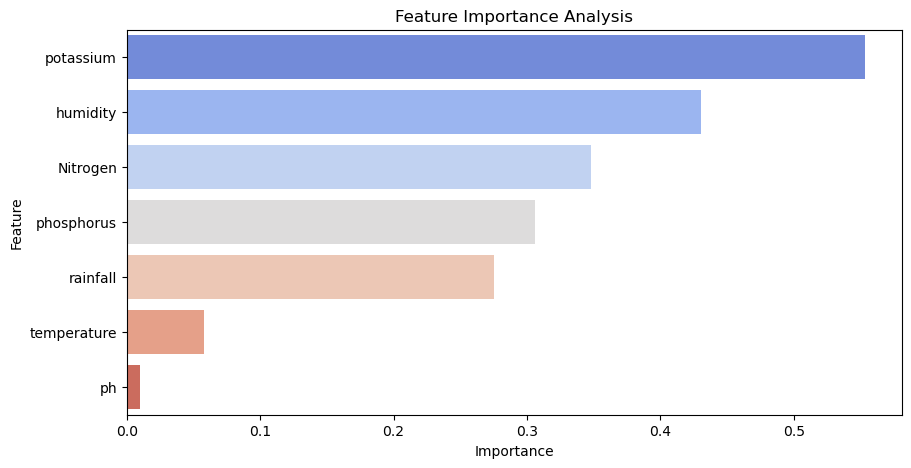


✅ Model Training Time: 0.1352 seconds
✅ Model Testing Time: 0.0100 seconds
✅ Feature Importance Calculation Time: 0.4120 seconds

📌 *Model Performance Metrics:*
✅ Training Accuracy: 99.3750%
✅ Test Accuracy: 97.5000%
✅ Cross-Validation Score: 97.9091%
✅ Precision: 97.5816%
✅ Recall: 97.8032%
✅ F1 Score: 97.6500%

Accuracy of the Decision Tree Model: 0.975

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  2  3  0]
 

In [34]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = "Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model (WITH REGULARIZATION)
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=10,  # Prevents overfitting by limiting depth
    min_samples_split=5,  # Ensures nodes have enough samples before splitting
    min_samples_leaf=3,  # Prevents tiny branches
    random_state=42
)

# Measure training time
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure testing time
start_test_time = time.time()
y_pred = dt_model.predict(X_test)
testing_time = time.time() - start_test_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Cross-Validation to Check Overfitting
cv_scores = cross_val_score(dt_model, X, y, cv=5)

# Feature Importance Analysis (using permutation importance)
start_feature_time = time.time()
perm_importance = permutation_importance(dt_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_time = time.time() - start_feature_time

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance Analysis")
plt.show()

# Formatting the output
def format_classification_report(report):
    formatted_report = ""
    formatted_report += f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}\n"
    formatted_report += "-" * 55 + "\n"
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            if label in ["accuracy", "macro avg", "weighted avg"]:
                formatted_report += f"{label:<15} {metrics['precision']:.2f}      {metrics['recall']:.2f}      {metrics['f1-score']:.2f}      {metrics['support']:4.0f}\n"
    formatted_report += "-" * 55 + "\n"
    formatted_report += f"{'Accuracy':<15} {accuracy:.8f}\n"
    return formatted_report

# Print Results
print(f"\n✅ Model Training Time: {training_time:.4f} seconds")
print(f"✅ Model Testing Time: {testing_time:.4f} seconds")
print(f"✅ Feature Importance Calculation Time: {feature_importance_time:.4f} seconds\n")

print(f"📌 *Model Performance Metrics:*")
print(f"✅ Training Accuracy: {accuracy_score(y_train, dt_model.predict(X_train)):.4%}")  # Should be <100% now
print(f"✅ Test Accuracy: {accuracy:.4%}")
print(f"✅ Cross-Validation Score: {cv_scores.mean():.4%}")
print(f"✅ Precision: {precision_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ Recall: {recall_score(y_test, y_pred, average='macro'):.4%}")
print(f"✅ F1 Score: {f1_score(y_test, y_pred, average='macro'):.4%}\n")

print("Accuracy of the Decision Tree Model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(format_classification_report(report))
